In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [206]:
loan=pd.read_csv("loan.csv")

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [207]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Data Reading

In [208]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

# Data Cleaning

In [209]:
loan.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [210]:
round(loan.isnull().sum()/len(loan.index),2)*100

id                                  0.0
member_id                           0.0
loan_amnt                           0.0
funded_amnt                         0.0
funded_amnt_inv                     0.0
term                                0.0
int_rate                            0.0
installment                         0.0
grade                               0.0
sub_grade                           0.0
emp_title                           6.0
emp_length                          3.0
home_ownership                      0.0
annual_inc                          0.0
verification_status                 0.0
issue_d                             0.0
loan_status                         0.0
pymnt_plan                          0.0
url                                 0.0
desc                               33.0
purpose                             0.0
title                               0.0
zip_code                            0.0
addr_state                          0.0
dti                                 0.0


In [211]:
column_nullvalues=loan.columns[100*(loan.isnull().sum()/len(loan.index))>90]

In [212]:
column_nullvalues

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [213]:
loan1=loan.drop(column_nullvalues,axis=1)

In [214]:
loan1.shape

(39717, 55)

In [215]:
loan.shape

(39717, 111)

In [216]:
(loan1.isnull().sum()/len(loan1.index))*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [217]:
loan1=loan1.drop(['desc','mths_since_last_delinq'],axis=1)

In [218]:
loan1.shape

(39717, 53)

In [219]:
loan1.isnull().sum(axis=1)

0        1
1        0
2        1
3        0
4        0
5        0
6        0
7        0
8        1
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       1
27       0
28       0
29       0
        ..
39687    4
39688    4
39689    4
39690    4
39691    4
39692    4
39693    4
39694    4
39695    4
39696    4
39697    4
39698    4
39699    4
39700    5
39701    4
39702    4
39703    4
39704    5
39705    4
39706    5
39707    4
39708    4
39709    4
39710    4
39711    4
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

In [220]:
len(loan1[loan1.isnull().sum(axis=1) > 5].index)

0

In [221]:
loan1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

In [222]:
loan1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [223]:
loan1['int_rate'] = loan1['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [224]:
loan1=loan1[~loan1['emp_length'].isnull()]
import re
loan1['emp_length']=loan1['emp_length'].apply(lambda x: re.findall('\d+',str(x))[0])
#convert to numeric
loan1['emp_length']=loan1['emp_length'].apply(lambda x: pd.to_numeric(x))

# Data Analysis

To start with the analysis, we have to understand the objectives of the loan andthe variables we want to consider for analysis.

The objective is to identify the predictors of default so that at the time of application, the bank can approve or reject the loan. 
we have three type of variables:
1. Details of the applicant
2. Loan characteristics
3. Behaviour variables

As we will not get the behavioural variables at the starting phase so we will drop the columns from the dataset.

In [225]:
behaviour_var =  [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type"]

In [226]:
behaviour_var

['delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'application_type']

In [227]:
loan1=loan1.drop(behaviour_var,axis=1)

In [228]:
loan1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 32 columns):
id                            38642 non-null int64
member_id                     38642 non-null int64
loan_amnt                     38642 non-null int64
funded_amnt                   38642 non-null int64
funded_amnt_inv               38642 non-null float64
term                          38642 non-null object
int_rate                      38642 non-null float64
installment                   38642 non-null float64
grade                         38642 non-null object
sub_grade                     38642 non-null object
emp_title                     37202 non-null object
emp_length                    38642 non-null int64
home_ownership                38642 non-null object
annual_inc                    38642 non-null float64
verification_status           38642 non-null object
issue_d                       38642 non-null object
loan_status                   38642 non-null object
pymnt_pl

In [229]:
loan1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 32 columns):
id                            38642 non-null int64
member_id                     38642 non-null int64
loan_amnt                     38642 non-null int64
funded_amnt                   38642 non-null int64
funded_amnt_inv               38642 non-null float64
term                          38642 non-null object
int_rate                      38642 non-null float64
installment                   38642 non-null float64
grade                         38642 non-null object
sub_grade                     38642 non-null object
emp_title                     37202 non-null object
emp_length                    38642 non-null int64
home_ownership                38642 non-null object
annual_inc                    38642 non-null float64
verification_status           38642 non-null object
issue_d                       38642 non-null object
loan_status                   38642 non-null object
pymnt_pl

In [230]:
# we will not able to use title, url, zip_code, addr_state in our analysis.
# column title is derived from purpose.
#we will drop these column from the dataset.

loan1=loan1.drop(['title','url','zip_code','addr_state'],axis=1)

In [231]:
loan1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 28 columns):
id                            38642 non-null int64
member_id                     38642 non-null int64
loan_amnt                     38642 non-null int64
funded_amnt                   38642 non-null int64
funded_amnt_inv               38642 non-null float64
term                          38642 non-null object
int_rate                      38642 non-null float64
installment                   38642 non-null float64
grade                         38642 non-null object
sub_grade                     38642 non-null object
emp_title                     37202 non-null object
emp_length                    38642 non-null int64
home_ownership                38642 non-null object
annual_inc                    38642 non-null float64
verification_status           38642 non-null object
issue_d                       38642 non-null object
loan_status                   38642 non-null object
pymnt_pl

In [232]:
loan1['loan_status']=loan1['loan_status'].astype('category')

In [233]:
loan1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 28 columns):
id                            38642 non-null int64
member_id                     38642 non-null int64
loan_amnt                     38642 non-null int64
funded_amnt                   38642 non-null int64
funded_amnt_inv               38642 non-null float64
term                          38642 non-null object
int_rate                      38642 non-null float64
installment                   38642 non-null float64
grade                         38642 non-null object
sub_grade                     38642 non-null object
emp_title                     37202 non-null object
emp_length                    38642 non-null int64
home_ownership                38642 non-null object
annual_inc                    38642 non-null float64
verification_status           38642 non-null object
issue_d                       38642 non-null object
loan_status                   38642 non-null category
pymnt_

In [234]:
loan1['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

In [235]:
loan1=loan1[loan1['loan_status']!='Current']

In [236]:
loan1['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current            0
Name: loan_status, dtype: int64

In [237]:
loan1['loan_status']=loan1['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

In [238]:
loan1['loan_status'].value_counts()

0    32145
1     5399
Name: loan_status, dtype: int64

# Univariate Analysis 

In [239]:
round(np.mean(loan1['loan_status']),2)

0.14

In [240]:
def plot_graph(cat_var):
    sns.barplot(x=cat_var,y='loan_status',data=loan1)
    plt.show()

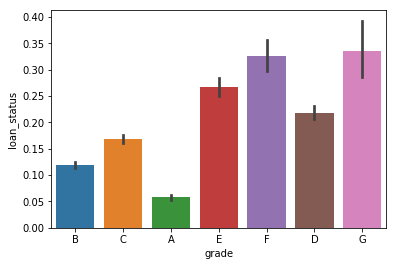

In [241]:
plot_graph('grade')

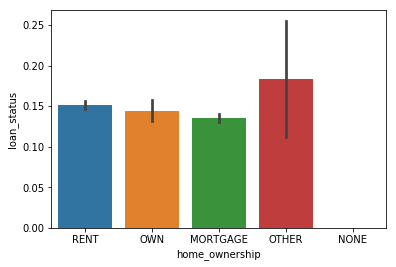

In [242]:
plot_graph('home_ownership')

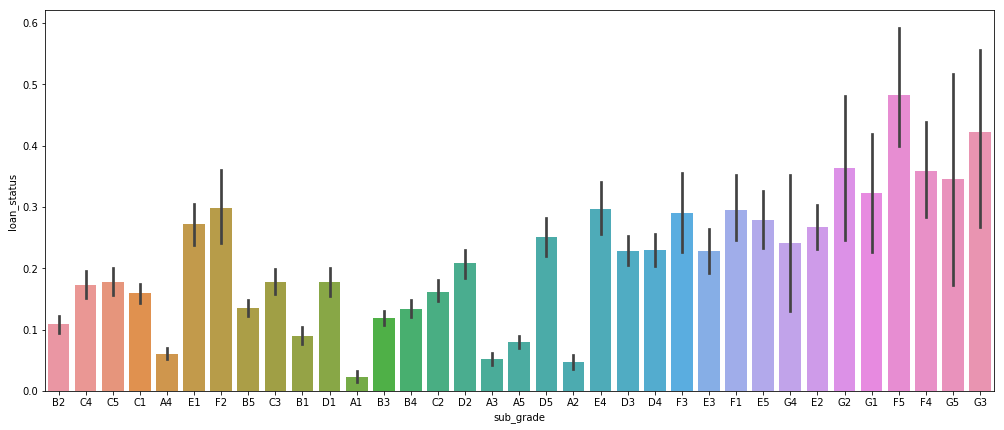

In [243]:
plt.figure(figsize=(17,7))
plot_graph('sub_grade')

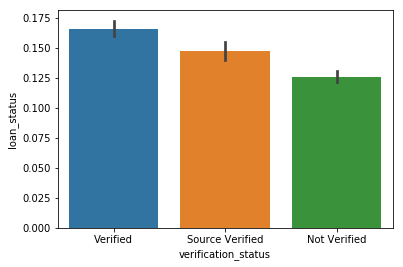

In [244]:
plot_graph('verification_status')

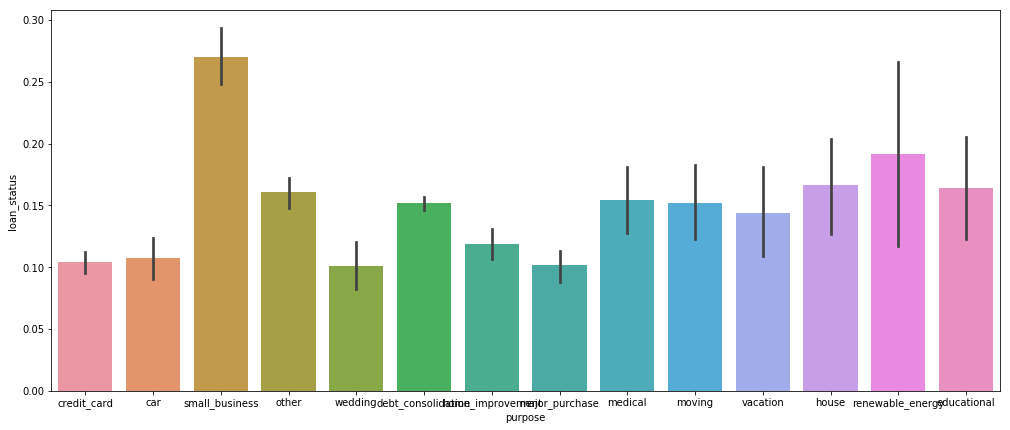

In [245]:
plt.figure(figsize=(17,7))
plot_graph('purpose')

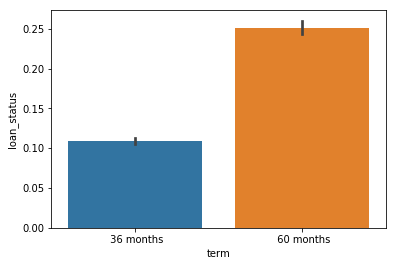

In [246]:
plot_graph('term')

In [247]:
loan1['issue_d'].tail()

39712    Jul-07
39713    Jul-07
39714    Jul-07
39715    Jul-07
39716    Jun-07
Name: issue_d, dtype: object

In [248]:
from datetime import datetime
loan1['issue_d']=loan1['issue_d'].apply(lambda x: datetime.strptime(x,'%b-%y'))

In [249]:
loan1['issue_d'].tail()

39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, dtype: datetime64[ns]

In [250]:
loan1['month']=loan1['issue_d'].apply(lambda x: (x.month))


In [251]:
loan1.groupby('month').month.count()

month
1     2331
2     2278
3     2632
4     2756
5     2838
6     3094
7     3253
8     3321
9     3394
10    3637
11    3890
12    4120
Name: month, dtype: int64

In [252]:
loan1['year']=loan1['issue_d'].apply(lambda x: (x.year))

In [253]:
loan1.groupby('year').year.count()

year
2007      251
2008     1562
2009     4716
2010    11214
2011    19801
Name: year, dtype: int64

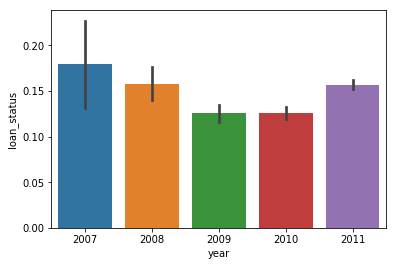

In [254]:
plot_graph('year')

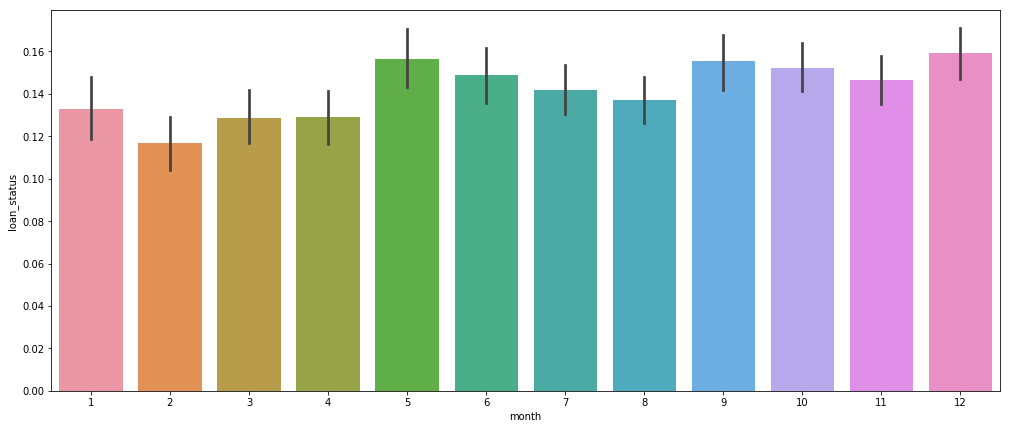

In [192]:
plt.figure(figsize=(17,7))
plot_graph('month')

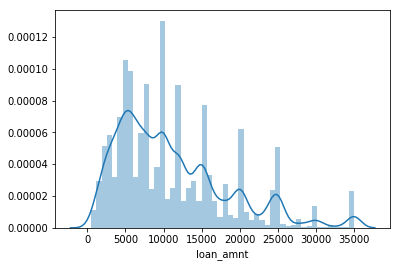

In [255]:
sns.distplot(loan1['loan_amnt'])
plt.show()


Binning the loan_amnt into various categories i.e; low,medium,high,very high.

In [259]:
loan1.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'dti',
       'initial_list_status', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'month', 'year'],
      dtype='object')

In [257]:
loan1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 39716
Data columns (total 30 columns):
id                            37544 non-null int64
member_id                     37544 non-null int64
loan_amnt                     37544 non-null object
funded_amnt                   37544 non-null int64
funded_amnt_inv               37544 non-null float64
term                          37544 non-null object
int_rate                      37544 non-null float64
installment                   37544 non-null float64
grade                         37544 non-null object
sub_grade                     37544 non-null object
emp_title                     36136 non-null object
emp_length                    37544 non-null int64
home_ownership                37544 non-null object
annual_inc                    37544 non-null float64
verification_status           37544 non-null object
issue_d                       37544 non-null datetime64[ns]
loan_status                   37544 non-null int64


In [256]:
# binning loan amount
def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
loan1['loan_amnt'] = loan1['loan_amnt'].apply(lambda x: loan_amount(x))

In [260]:
loan1['loan_amnt'].value_counts()

medium       20157
high          7572
low           7095
very high     2720
Name: loan_amnt, dtype: int64

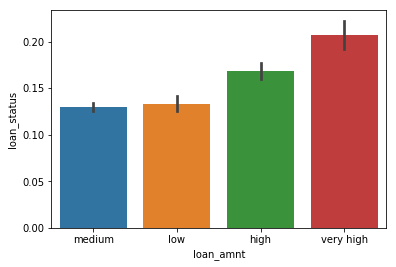

In [261]:
plot_graph('loan_amnt')

In [262]:
loan1['funded_amnt_inv']=loan1['funded_amnt_inv'].apply(lambda x: loan_amount(x))

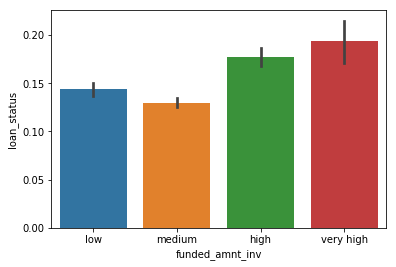

In [263]:
plot_graph('funded_amnt_inv')

In [266]:
def int_rate(n):
    if n <=10:
        return 'low'
    elif n>10 and n<=15:
        return 'medium'
    else:
        return 'high'

loan1['int_rate']=loan1['int_rate'].apply(lambda x: int_rate(x))

In [267]:
loan1['int_rate'].value_counts()

medium    17880
low       11834
high       7830
Name: int_rate, dtype: int64

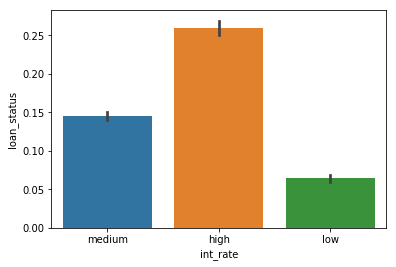

In [268]:
plot_graph('int_rate')

In [270]:
def dti(n):
    if n<=10:
        return 'low'
    elif n>10 and n<=20:
        return 'medium'
    else:
        return 'high'

loan1['dti']=loan1['dti'].apply(lambda x: dti(x))

In [271]:
loan1['dti'].value_counts()

medium    18002
low       12545
high       6997
Name: dti, dtype: int64

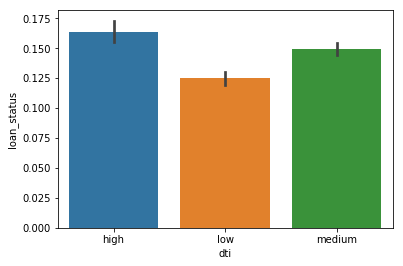

In [272]:
plot_graph('dti')

In [273]:
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
loan1['installment'] = loan1['installment'].apply(lambda x: installment(x))

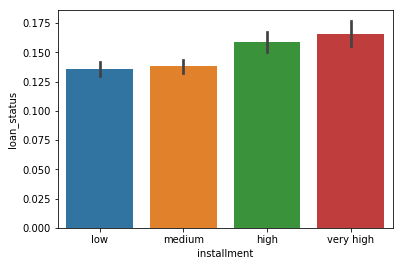

In [274]:
plot_graph('installment')

In [275]:
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'
loan1['annual_inc']=loan1['annual_inc'].apply(lambda x: annual_income(x))

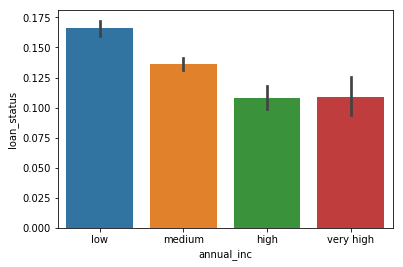

In [277]:
plot_graph('annual_inc')

In [280]:
loan1=loan1[~loan1['emp_length'].isnull()]

In [281]:
def emp_length(n):
    if n <= 1:
        return 'fresher'
    elif n > 1 and n <=3:
        return 'junior'
    elif n > 3 and n <=7:
        return 'senior'
    else:
        return 'expert'
loan1['emp_length']=loan1['emp_length'].apply(lambda x: emp_length(x))

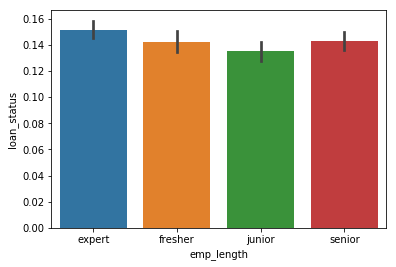

In [282]:
plot_graph('emp_length')

# Segmented analysis

While taking loan the most important thing is purpose of taking loan.Let's analyze with respect to loan_status.

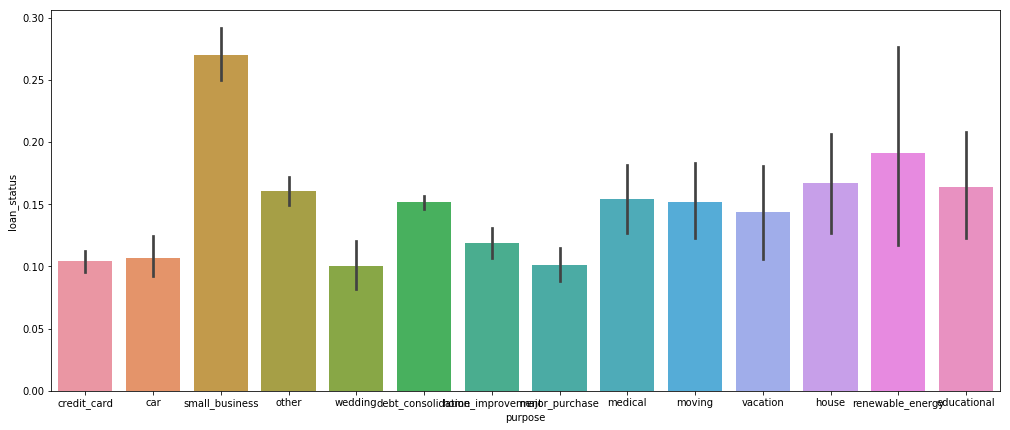

In [283]:
plt.figure(figsize=(17,7))
plot_graph('purpose')

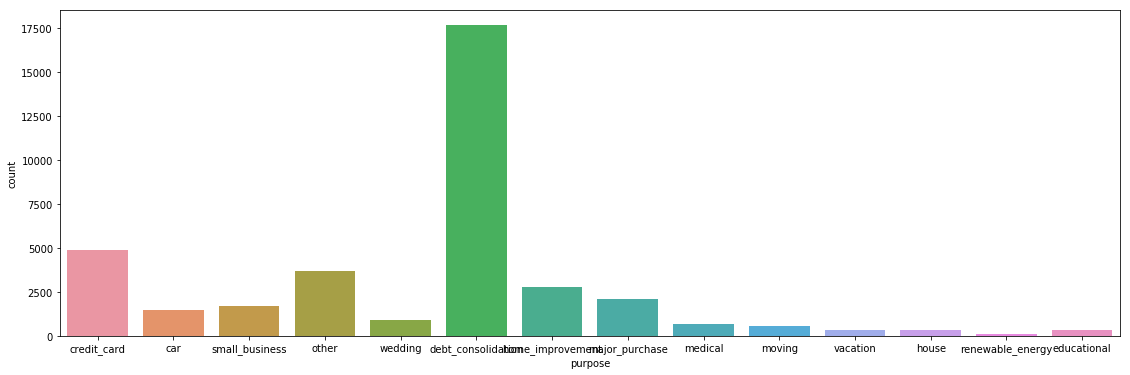

In [286]:
# lets first look at the number of loans for each type (purpose) of the loan
# most loans are debt consolidation (to repay otehr debts), then credit card, major purchase etc.
plt.figure(figsize=(19,6))
sns.countplot(x='purpose', data=loan1)
plt.show()

Let's analyze top 4 purposes i.e;debt consolidation, credit_card,home_improvement,major_purchase

In [287]:
main_p=['credit_card','debt_consolidation','home_improvement','major_purchase']
loan1=loan1[loan1['purpose'].isin(main_p)]
loan1['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
home_improvement       2785
major_purchase         2080
Name: purpose, dtype: int64

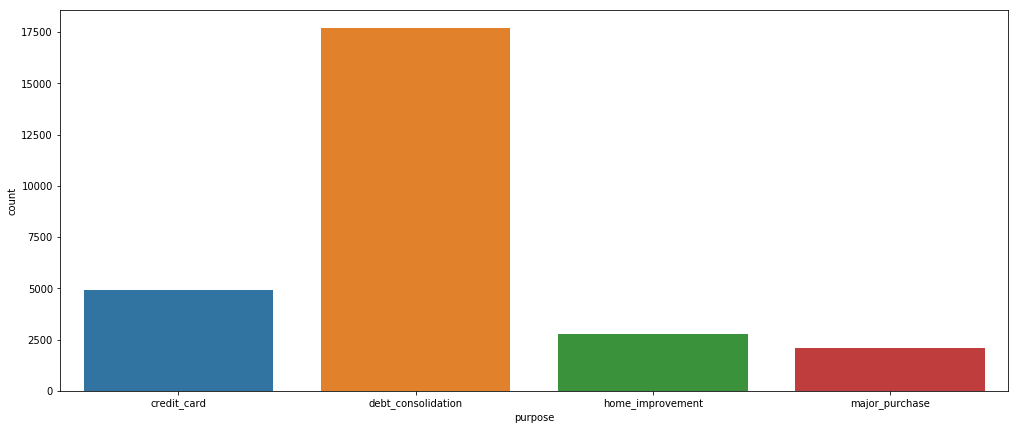

In [289]:
plt.figure(figsize=(17,7))
sns.countplot(x=loan1['purpose'])
plt.show()

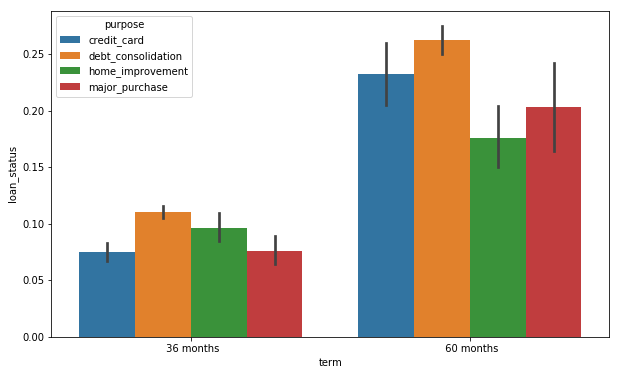

In [290]:
# let's now compare the default rates across two types of categorical variables
# purpose of loan (constant) and another categorical variable (which changes)
plt.figure(figsize=(10,6))
sns.barplot(x='term',y='loan_status',hue='purpose',data=loan1)
plt.show()

In [291]:
def plot_segmented(cat_var):
    plt.figure(figsize=(10,7))
    sns.barplot(x=cat_var,y='loan_status',hue='purpose',data=loan1)
    plt.show()

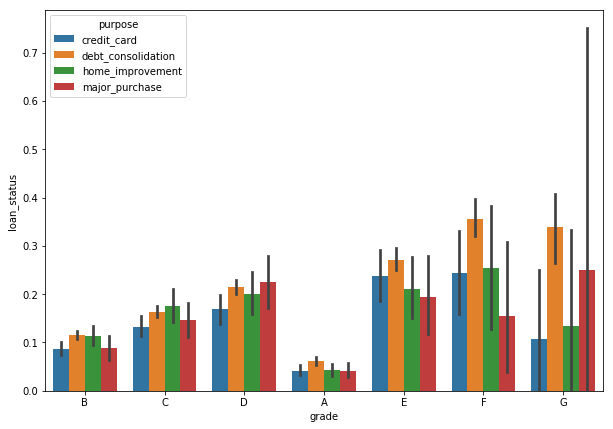

In [292]:
plot_segmented('grade')

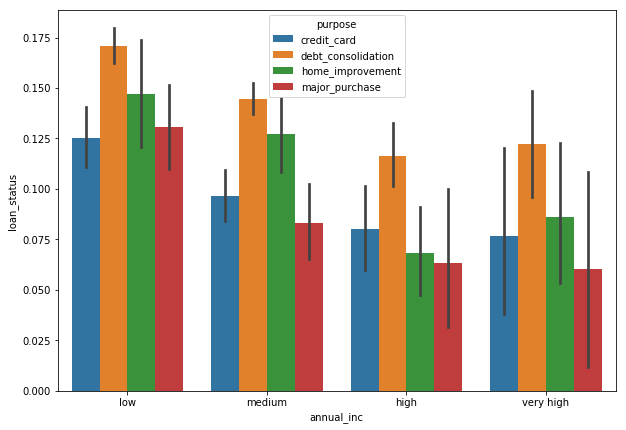

In [293]:
plot_segmented('annual_inc')

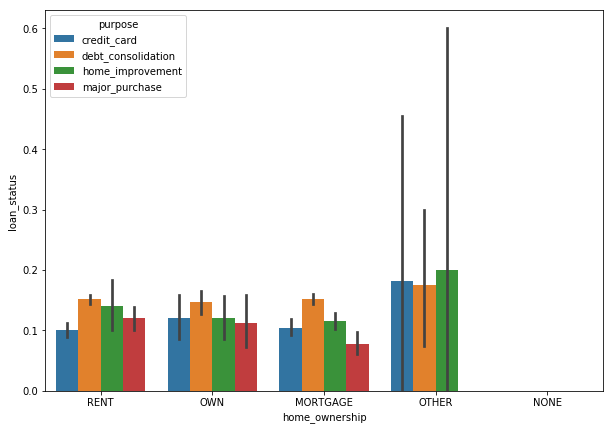

In [294]:
plot_segmented('home_ownership')

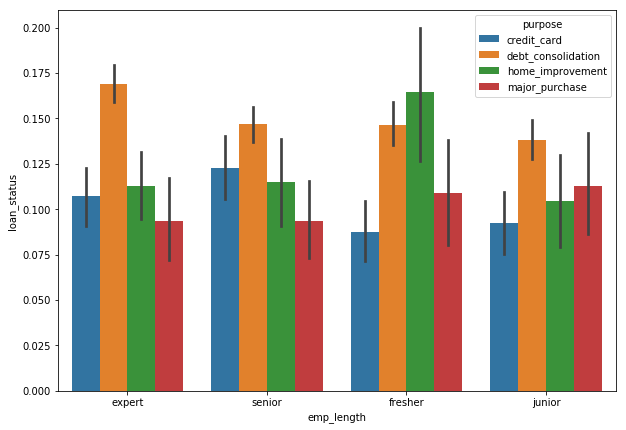

In [295]:
plot_segmented('emp_length')

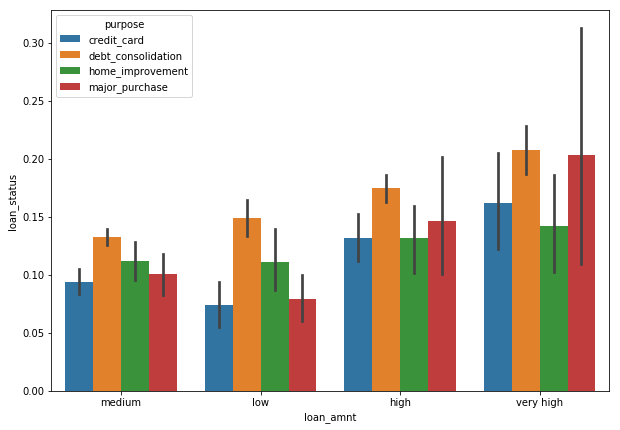

In [296]:
plot_segmented('loan_amnt')

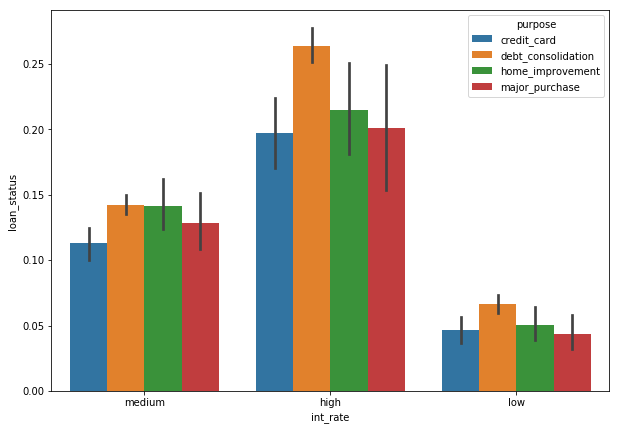

In [297]:
plot_segmented('int_rate')

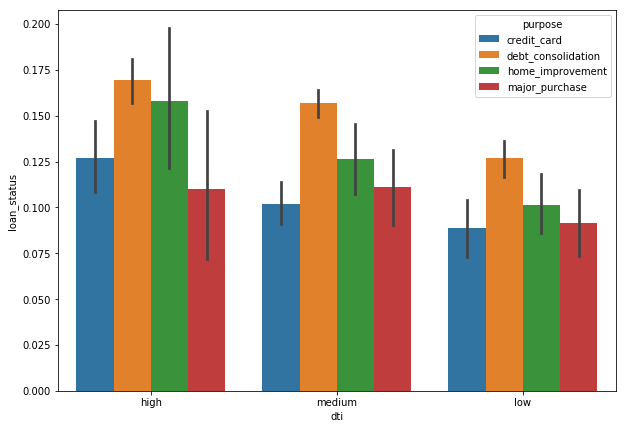

In [298]:
plot_segmented('dti')

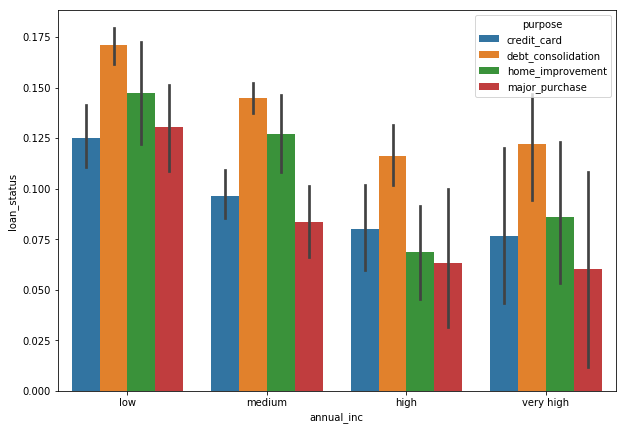

In [299]:
plot_segmented('annual_inc')

A good way to quantify th effect of a categorical variable on default rate is to see 'how much does the default rate vary across the categories'.

Let's see an example using annual_inc as the categorical variable.

In [301]:
loan1.groupby('annual_inc').loan_status.mean().sort_values(ascending=False)

annual_inc
low          0.157966
medium       0.130075
very high    0.101570
high         0.097749
Name: loan_status, dtype: float64

In [303]:
# one can write a function which takes in a categorical variable and computed the average 
# default rate across the categories
# It can also compute the 'difference between the highest and the lowest default rate' across the 
# categories, which is a decent metric indicating the effect of the varaible on default rate

def diff_rate(cat_var):
    default_rates =loan1.groupby(cat_var).loan_status.mean().sort_values(ascending=False)
    return (round(default_rates, 2), round(default_rates[0] - default_rates[-1], 2))

default_rates, diff = diff_rate('annual_inc')
print(default_rates) 
print(diff)

annual_inc
low          0.16
medium       0.13
very high    0.10
high         0.10
Name: loan_status, dtype: float64
0.06


In [304]:
loan1_categorical = loan1.loc[:, loan1.dtypes == object]
loan1_categorical['loan_status'] = loan1['loan_status']

# Now, for each variable, we can compute the incremental diff in default rates
print([i for i in loan1.columns])

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'dti', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens', 'month', 'year']


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [306]:
# storing the diff of default rates for each column in a dict
d = {key: diff_rate(key)[1]*100 for key in loan1_categorical.columns if key != 'loan_status'}
print(d)

{'loan_amnt': 7.000000000000001, 'funded_amnt_inv': 6.0, 'term': 15.0, 'int_rate': 19.0, 'installment': 3.0, 'grade': 27.0, 'sub_grade': 46.0, 'emp_title': 100.0, 'emp_length': 2.0, 'home_ownership': 16.0, 'annual_inc': 6.0, 'verification_status': 4.0, 'pymnt_plan': 0.0, 'purpose': 5.0, 'dti': 5.0, 'initial_list_status': 0.0}


In [308]:
pd.DataFrame.from_dict(d, orient='index')

,0
loan_amnt,7.0
funded_amnt_inv,6.0
term,15.0
int_rate,19.0
installment,3.0
grade,27.0
sub_grade,46.0
emp_title,100.0
emp_length,2.0
home_ownership,16.0
